In [1950]:
#importing all the dependencies
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#supressing the Warnings
import warnings
warnings.filterwarnings("ignore")

### 1. Loading, Analysis and Cleaning Dataset

##### 1.1 Loading Data into lead dataset.

In [1953]:
#Loading data into lead dataset using pandas
lead = pd.read_csv("Leads.csv")

In [1954]:
#Validating the data of lead dataset
lead.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


##### 1.2 Analysing the lead data frame.

In [1956]:
#Checking the information of the columns in the dataset
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9237 entries, 0 to 9236
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9237 non-null   object 
 1   Lead Number                                    9237 non-null   int64  
 2   Lead Origin                                    9237 non-null   object 
 3   Lead Source                                    9201 non-null   object 
 4   Do Not Email                                   9237 non-null   object 
 5   Do Not Call                                    9237 non-null   object 
 6   Converted                                      9237 non-null   int64  
 7   TotalVisits                                    9100 non-null   float64
 8   Total Time Spent on Website                    9237 non-null   int64  
 9   Page Views Per Visit                           9100 

In [1957]:
# Checking the total number of rows and columns of the dataset
lead.shape

(9237, 37)

In [1958]:
#verifying the numeric values of the dataset
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9237.000000,9237.000000,9100.000000,9237.000000,9100.000000,5019.000000,5019.000000
mean,617178.970661,0.385298,3.445604,487.529176,2.362830,14.306436,16.345089
std,23403.902021,0.486692,4.855603,547.899953,2.161757,1.386657,1.811807
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596483.000000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615473.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637376.000000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


##### 1.3 Cleaning the data of lead dataset

###### We have seen many fields have the Select values which is equivalent to null. So, we will replace Select with NaN in the entire lead dataset.

In [1961]:
#Relpacing Select values with NaN
lead = lead.replace('Select', np.nan)

In [1962]:
#Checking the columns for Null Values
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7248
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [1963]:
#Finding the null percentage accross columns
round(lead.isnull().sum()/len(lead.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

###### 
###### We can see there are columns which have more than 40% null values. We can drop those columns.
###### 

In [1965]:
#dropping the columns with missing values more than 40%
lead = lead.drop(columns = ['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 
                            'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'])

In [1966]:
#Finding Null percentage after removing the columns
round(lead.isnull().sum()/len(lead.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

##### The 'Country' column has 27% missing values. Plotting a count plot of the column.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'

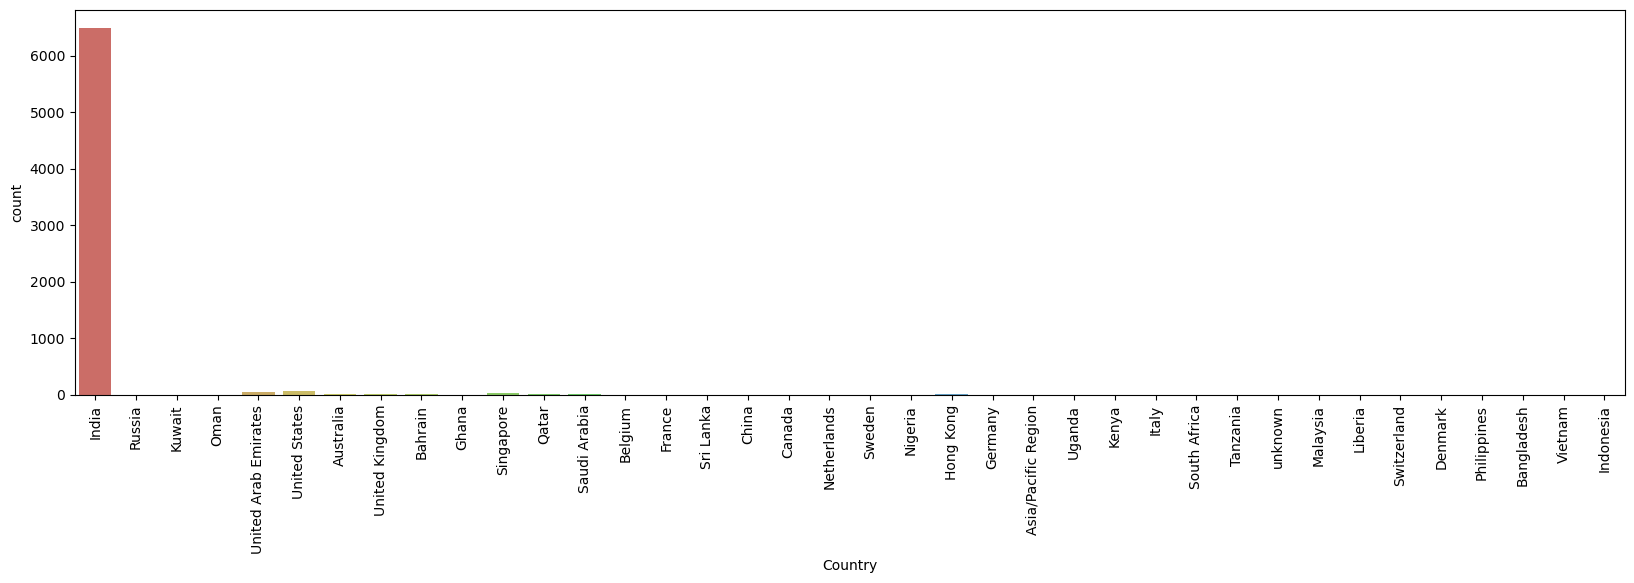

In [1968]:
#Plotting count plot for 'Country' column
plt.figure(figsize = (20,5))
sns.countplot(x = 'Country', data = lead, palette = 'hls')
plt.xticks(rotation = 90)

##### By looking at the above plot we can say this column is highly skewed. But as the column is important for analysis we can't drop it from the table. We will impute the null values of this column with value 'India'

In [1970]:
lead['Country'] = lead['Country'].replace(np.nan, 'India')

##### The Specialization column has 37% missing values

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

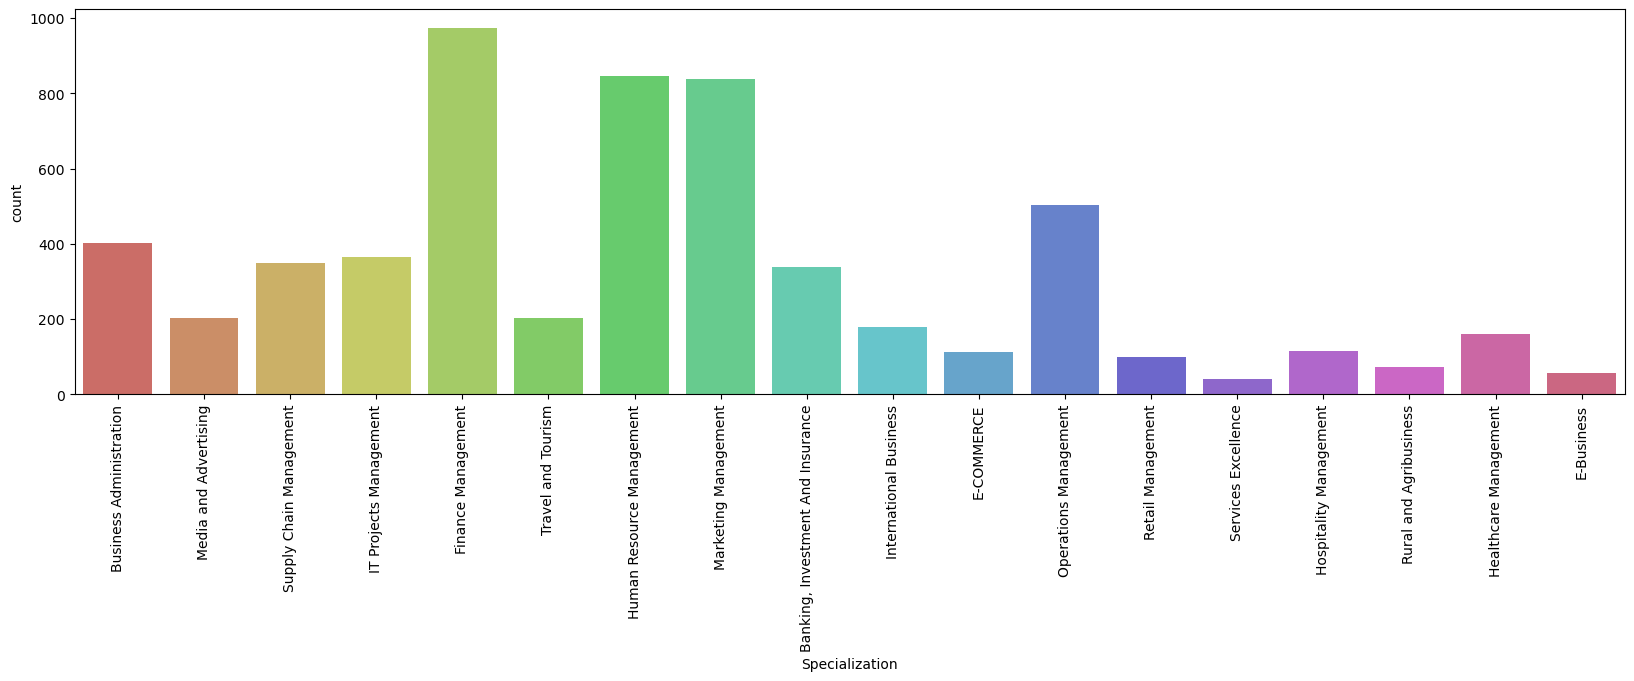

In [1972]:
#Plotting countplot with Specialisation
plt.figure(figsize=(20,5))
sns.countplot(x = 'Specialization', data = lead, palette="hls")
plt.xticks(rotation = 90)

##### As 37% of values are missing from the Specialization column, It is possible the for many Specialization it might be blank.
##### So creating a new category 'Others' for this value

In [1974]:
#Creating an Other category for Null values.
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')

##### The Column 'What is your current occupation' have 29% missing values. Plotting count plot of this column.'

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

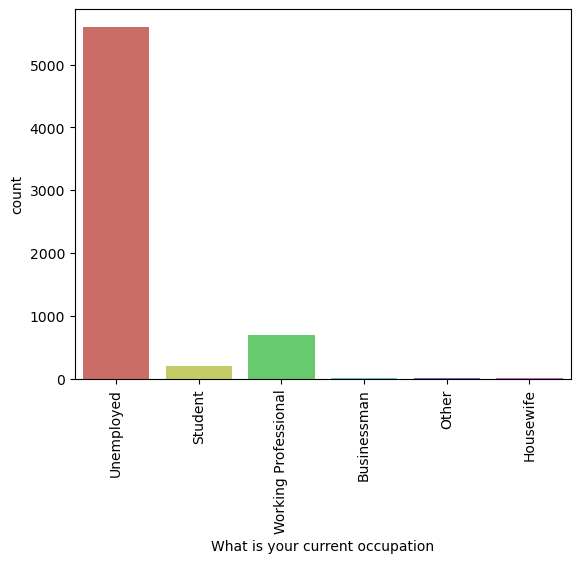

In [1976]:
#ploting count plot for 'What is your current occupation' column
sns.countplot(x = 'What is your current occupation', data = lead, palette = 'hls')
plt.xticks(rotation = 90)

##### By looking at the abouve graph we can say the most of the values are 'Unemployed'. We can impute missing values in this column with this value.

In [1978]:
#Replacing null values with 'Unemployeed' in the 'What is your current occupation' column
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

##### The column 'What matters most to you in choosing a course', this column has 29% missing values
##### Ploting the countplot for this column

([0, 1, 2],
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

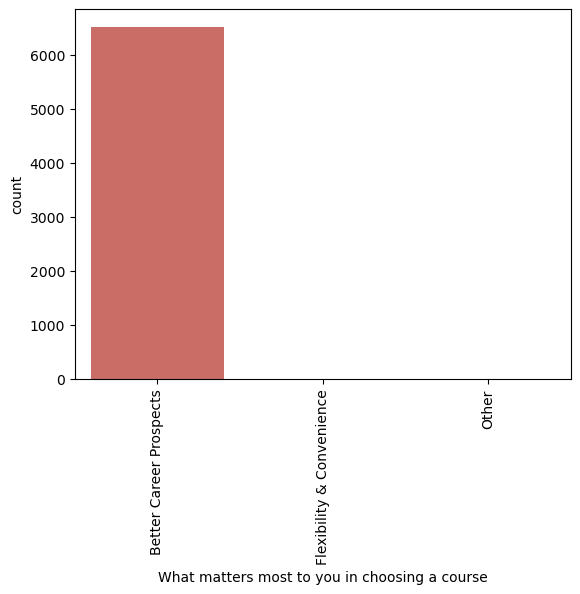

In [1980]:
# Ploting countplot for 'What matters most to you in choosing a course' column
sns.countplot(x = 'What matters most to you in choosing a course', data = lead, palette = 'hls')
plt.xticks(rotation = 90)

#### Another column Tag is having 36% Null values.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0,

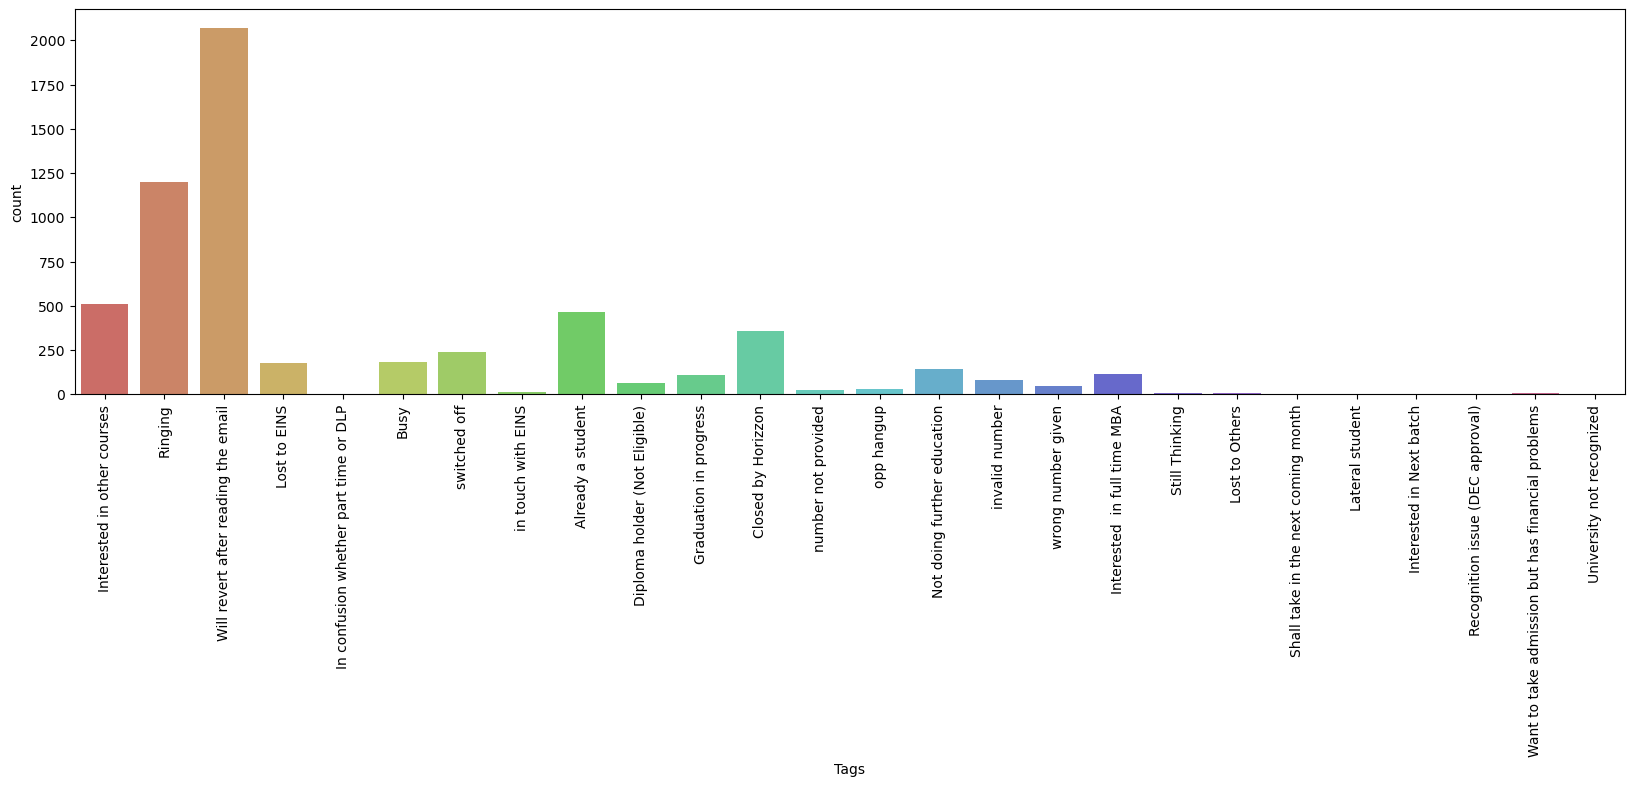

In [1982]:
#Plotting count plot for this column.
plt.figure(figsize = (20,5))
sns.countplot(x = 'Tags', data = lead, palette = 'hls')
plt.xticks(rotation = 90)

##### Based on the plot above we can see, most of the values are 'will revert after reading the email' so we can impute the Null values with this.

In [1984]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'
lead['Tags'] = lead['Tags'].replace(np.nan, 'Will revert after reading the email')

In [1985]:
#By looking at the above graph we can see the column is highly skewed so will remove this column.
lead = lead.drop('What matters most to you in choosing a course', axis = 1)

##### The Column 'City' have 40% missing values, plottin a count plot for this column.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

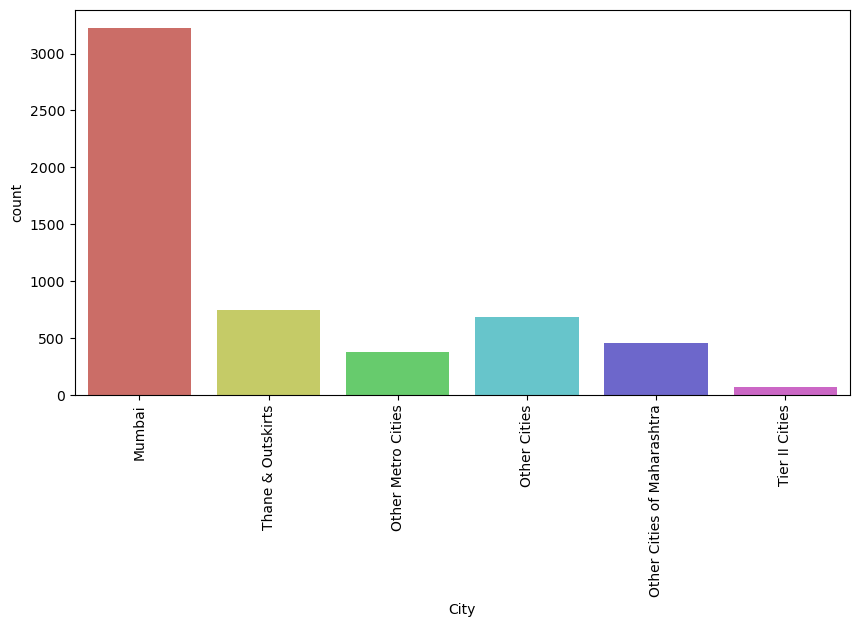

In [1987]:
#Plotting a count plot on 'City' column
plt.figure(figsize=(10,5))
sns.countplot(x = 'City', data = lead, palette = 'hls')
plt.xticks(rotation = 90)

##### From the above plot we can see that most values are of "Mumbai", so we can impute the null values with 'Mumbai'.

In [1989]:
#Replaccing Null values of city column with Mumbai.
lead['City'] = lead['City'].replace(np.nan, 'Mumbai')

In [1990]:
#Finding the Null percentage after treating the columns.
round(lead.isnull().sum()/len(lead.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

##### There are columns (TotalVisits, Page Views Per Visit, Last Activity) which have 1% null values so will drop these fields.

In [1992]:
# Dropping the columns with null values.
lead.dropna(inplace = True)

In [1993]:
# Finding the Null percentage after dropping the columns.
round(lead.isnull().sum()/len(lead.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

##### Now we can see there is no null values in the columns.

### 2. Exploatory Data Analysis

In [1996]:
#Checking for duplicates in the dataset.
lead[lead.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


###### There is no duplicate record in the dataset.

#### 2.1 Univariate Analysis

##### 2.1.1 Categorical Variable

<Axes: xlabel='Lead Origin', ylabel='count'>

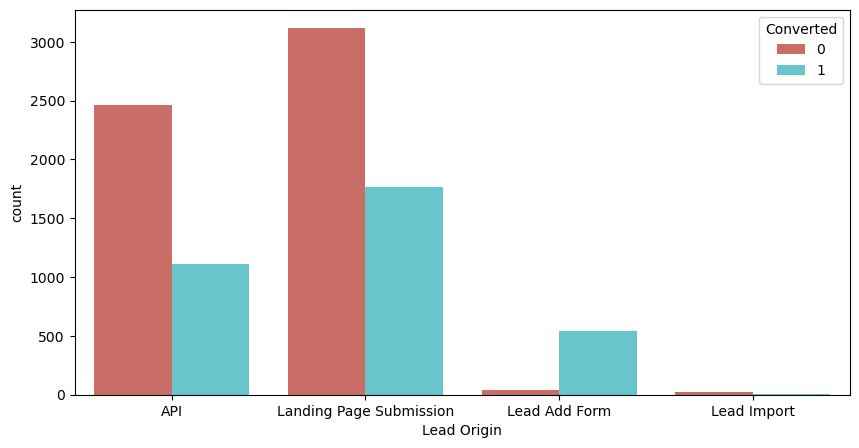

In [2000]:
#Ploting for Lead Origin
plt.figure(figsize = (10,5))
sns.countplot(x = 'Lead Origin', data = lead, hue = 'Converted', palette = 'hls')

##### We need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form in order to improve overall lead conversion rate.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

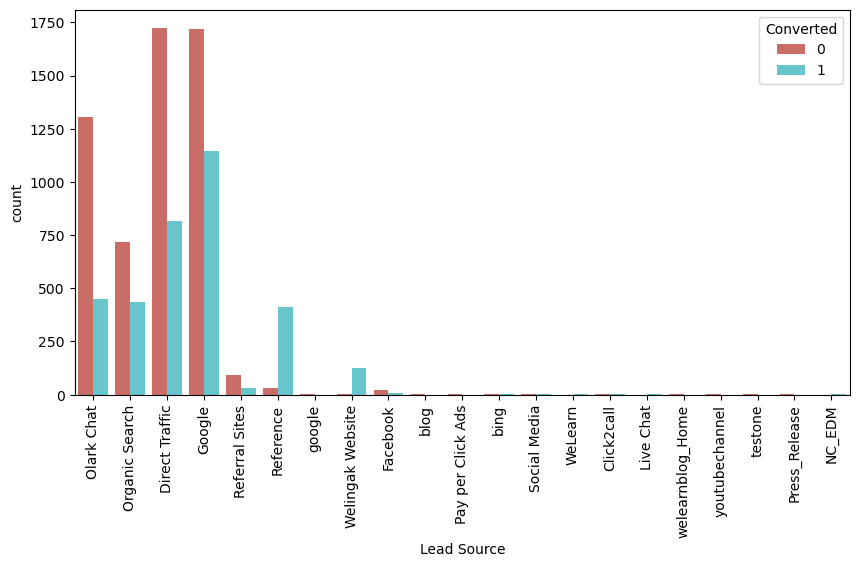

In [2002]:
#Ploting for Lead Source
plt.figure(figsize = (10,5))
sns.countplot(x = 'Lead Source', data = lead, hue = 'Converted', palette = 'hls')
plt.xticks(rotation = 90)

###### Creating a new category 'Others' for the categories which doesn't have much values under Lead Source column.

In [2004]:
lead['Lead Source'] = lead['Lead Source'].replace(['blog','Pay per Click Ads', 'bing','Social Media','WeLearn','Click2call','Live Chat'
                                                  ,'welearnblog_Home','youtubechannel','testone','Press_Release','NC_EDM'], 'Others')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'Others')])

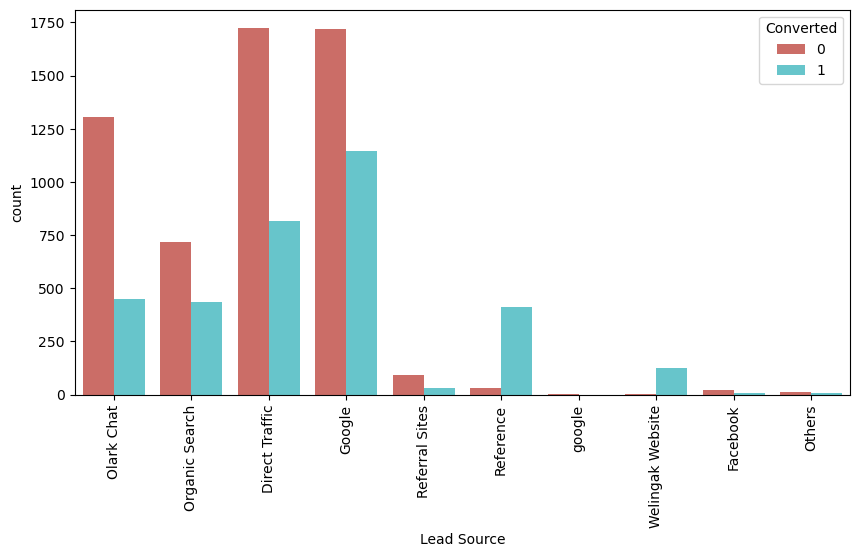

In [2005]:
#Plotting the bar again
plt.figure(figsize = (10,5))
sns.countplot(x = 'Lead Source', data = lead, hue = 'Converted', palette = 'hls')
plt.xticks(rotation = 90)

###### We can see there are two columns with the name 'Google' and 'google'. So replacing the 'google' with 'Google'.

In [2007]:
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

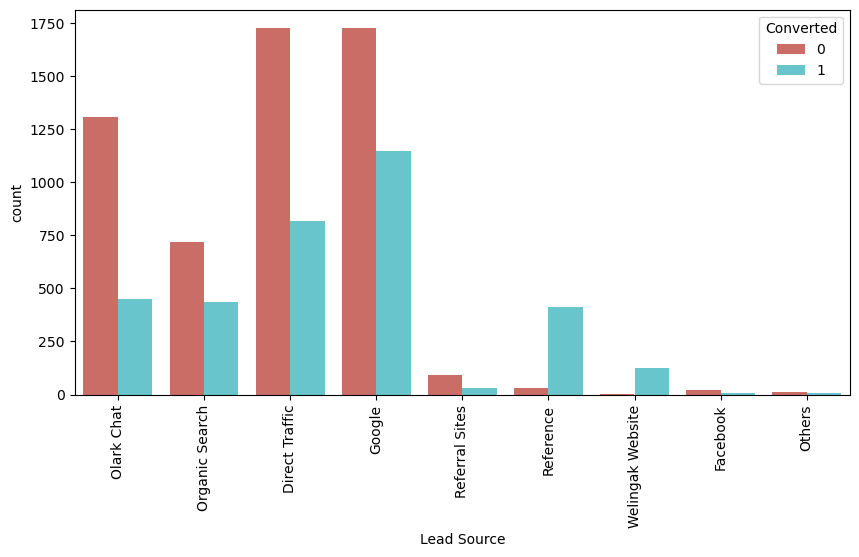

In [2008]:
#Plotting the bar again
plt.figure(figsize = (10,5))
sns.countplot(x = 'Lead Source', data = lead, hue = 'Converted', palette = 'hls')
plt.xticks(rotation = 90)

###### To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

<Axes: xlabel='Do Not Email', ylabel='count'>

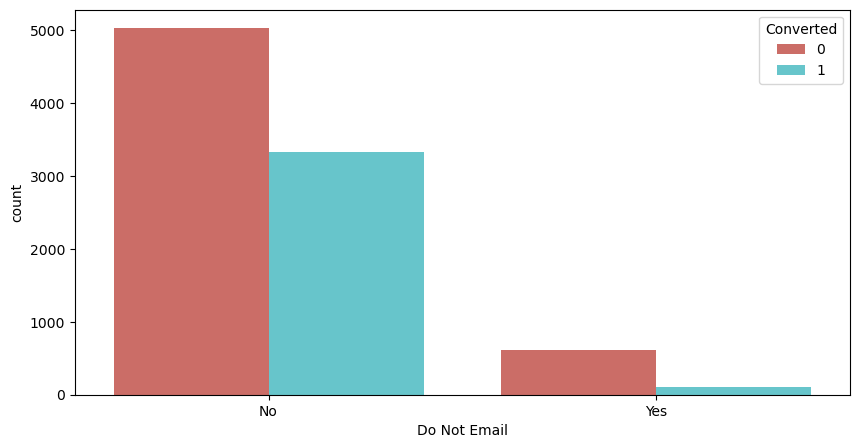

In [2010]:
#Ploting the bar to 'Do Not Email'
plt.figure(figsize = (10,5))
sns.countplot(x = 'Do Not Email', data = lead, hue = 'Converted', palette = 'hls')

<Axes: xlabel='Do Not Call', ylabel='count'>

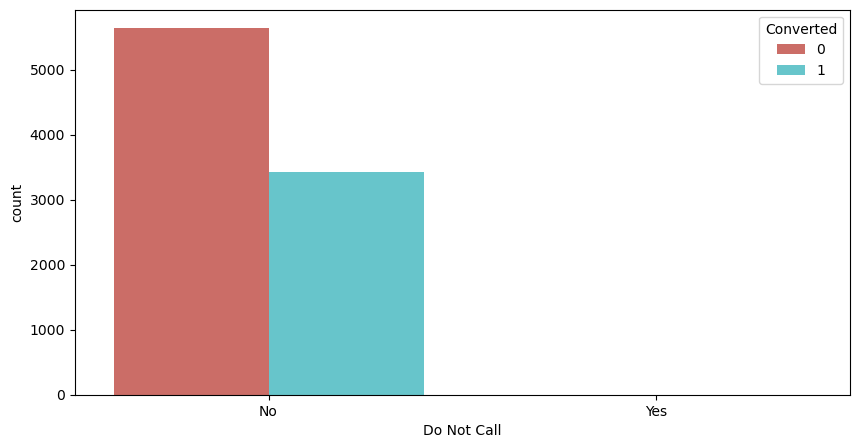

In [2011]:
#Ploting the bar to 'Do Not Call'
plt.figure(figsize = (10,5))
sns.countplot(x = 'Do Not Call', data = lead, hue = 'Converted', palette = 'hls')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'

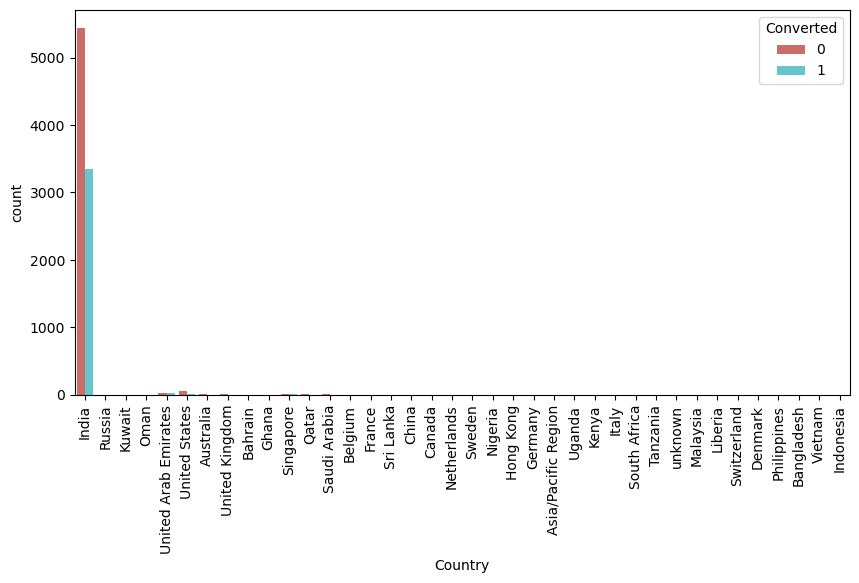

In [2012]:
#Ploting the bar to 'Country'
plt.figure(figsize = (10,5))
sns.countplot(x = 'Country', data = lead, hue = 'Converted', palette = 'hls')
plt.xticks(rotation = 90)

###### There are too many countries which is very less values. Converging all the other countries as 'Outside India'.

In [2014]:
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    else:
        category = "outside india"
    return category

lead['Country'] = lead.apply(lambda x:slots(x['Country']), axis = 1)

([0, 1], [Text(0, 0, 'India'), Text(1, 0, 'outside india')])

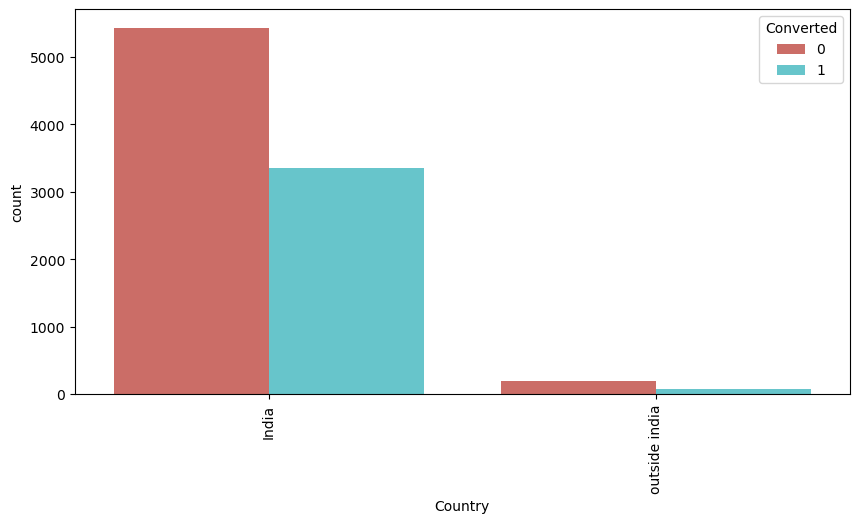

In [2015]:
# plotting the graph again:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Country', data = lead, hue = 'Converted', palette = 'hls')
plt.xticks(rotation = 90)

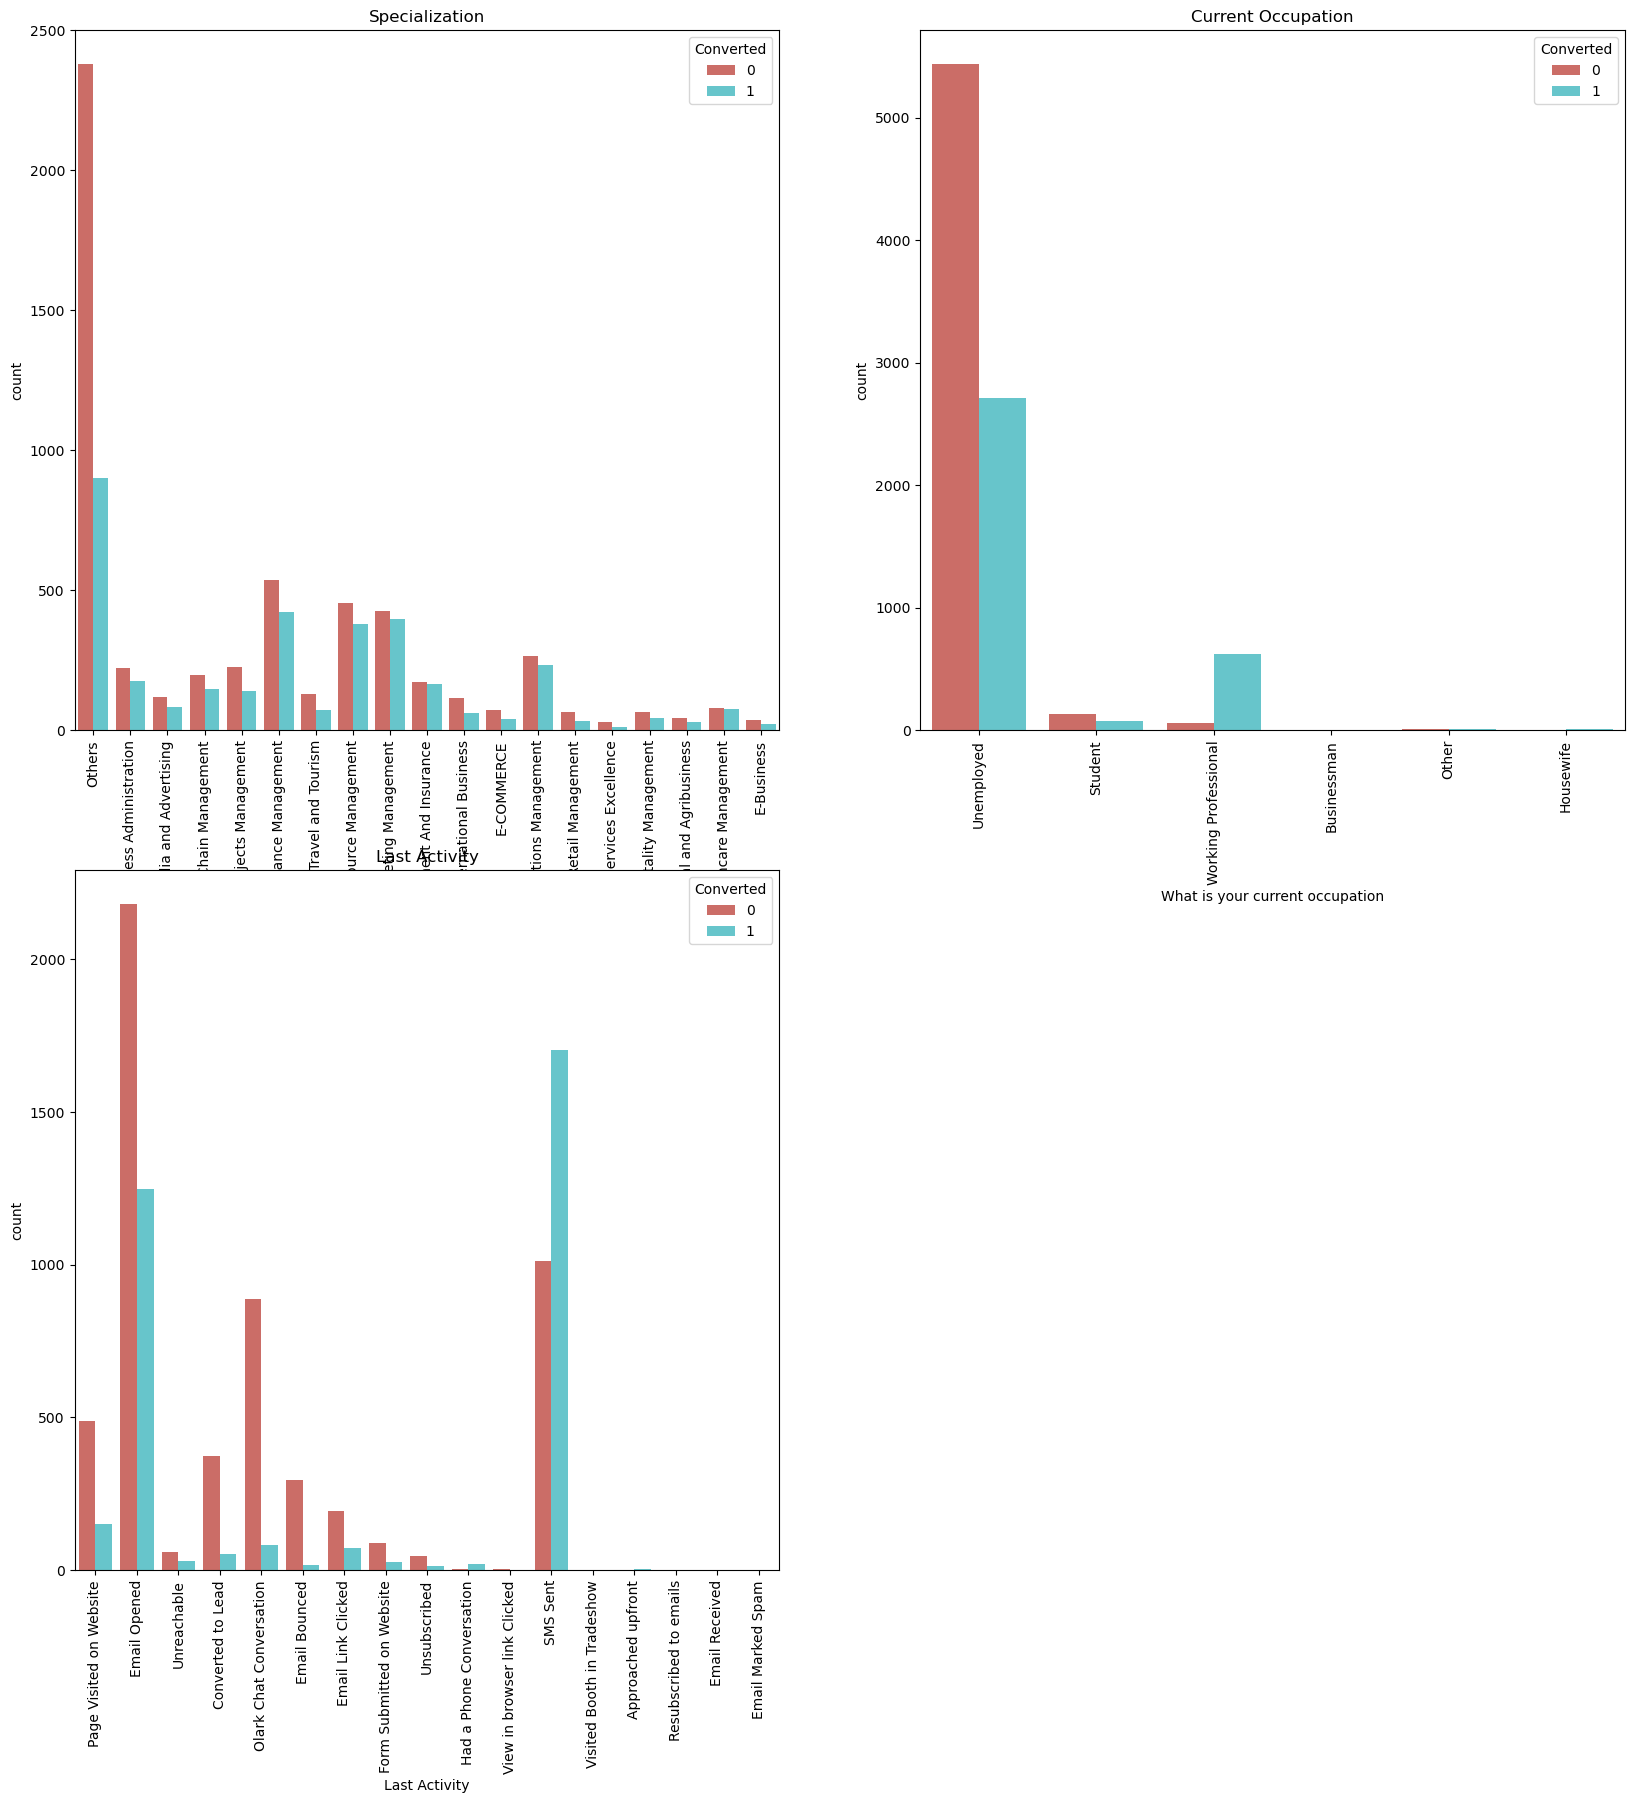

In [2016]:
plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
sns.countplot(x = 'Specialization', data = lead, hue = 'Converted', palette = 'hls')
plt.xticks(rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(x = 'What is your current occupation', data = lead, hue = 'Converted', palette = 'hls')
plt.xticks(rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(x = 'Last Activity', data = lead, hue = 'Converted', palette = 'hls')
plt.xticks(rotation = 90)
plt.title('Last Activity')
plt.show()

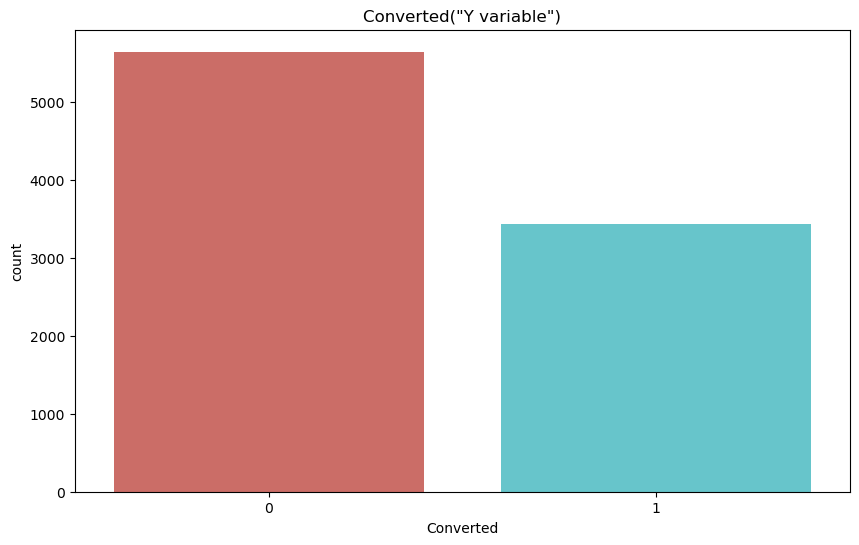

In [2017]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Converted', data = lead, palette = 'hls')
plt.title('Converted("Y variable")')
plt.show()

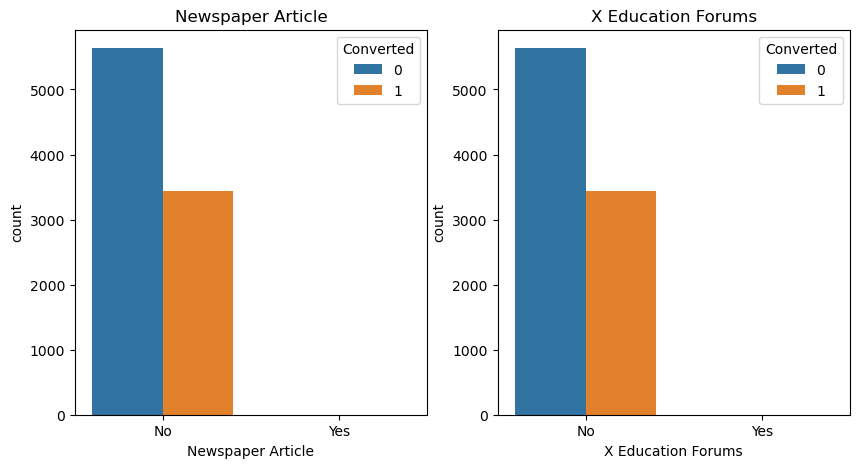

In [2018]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= lead).tick_params(axis='x')
plt.title('Newspaper Article')
plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= lead).tick_params(axis='x')
plt.title('X Education Forums')
plt.show()

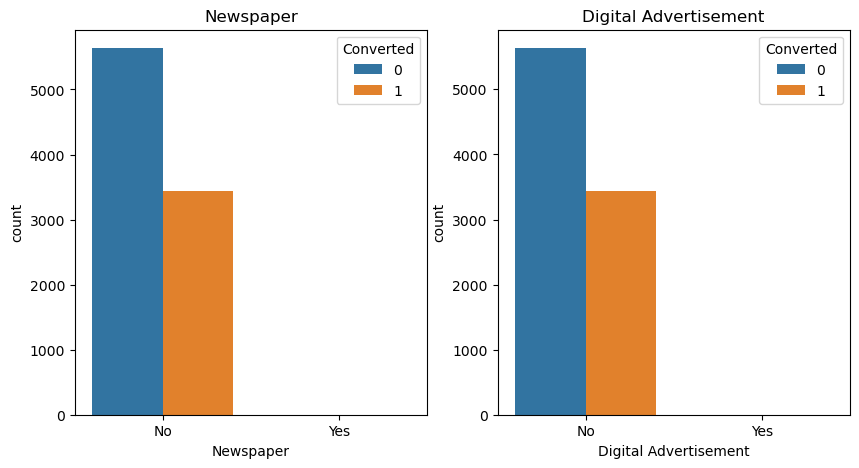

In [2019]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= lead).tick_params(axis='x')
plt.title('Newspaper')
plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= lead).tick_params(axis='x')
plt.title('Digital Advertisement')
plt.show()

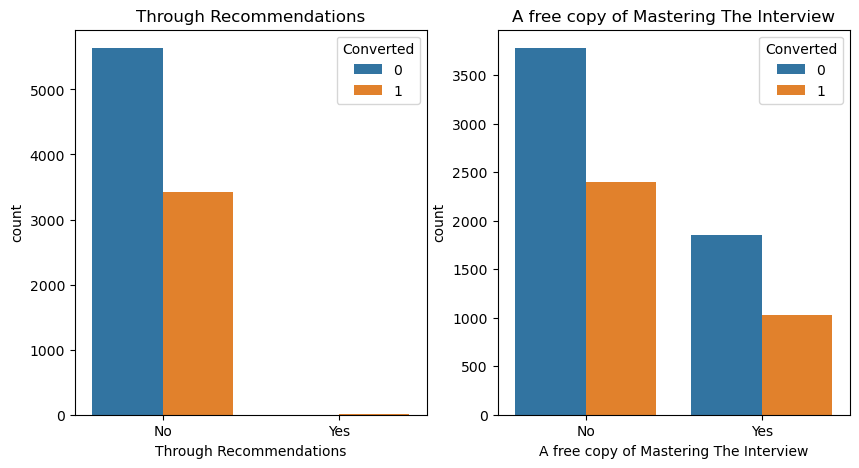

In [2020]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= lead).tick_params(axis='x')
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= lead).tick_params(axis='x')
plt.title('A free copy of Mastering The Interview')
plt.show()


##### 2.1.1. Numerical Variables

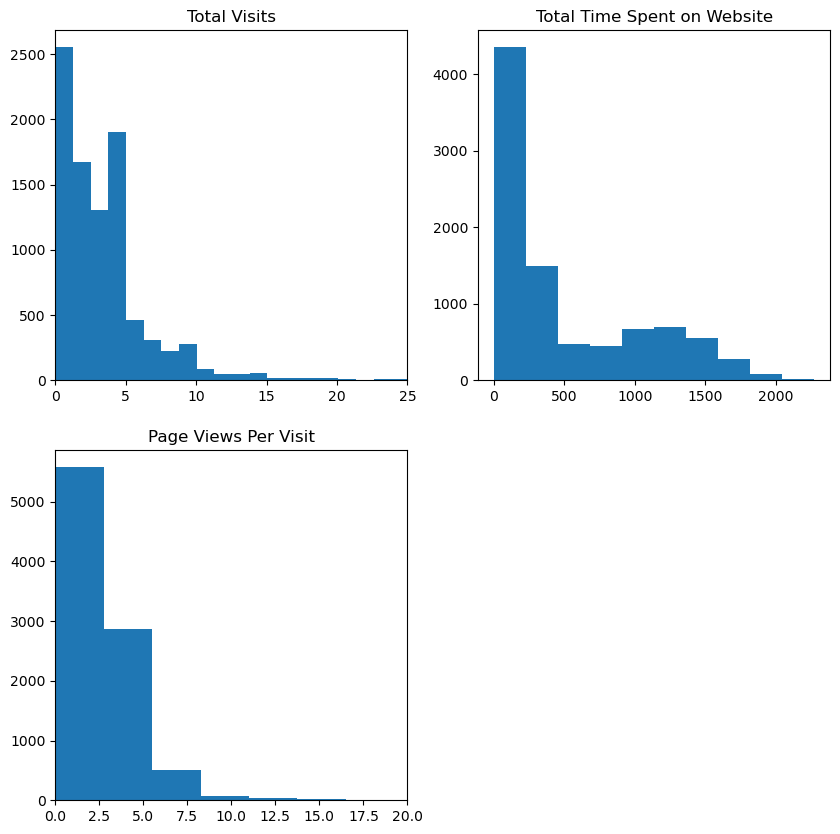

In [2022]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(lead['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(lead['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(lead['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

##### Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

In [2024]:
lead = lead.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],axis = 1)

In [2025]:
lead.shape

(9071, 14)

In [2026]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9071 entries, 0 to 9236
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9071 non-null   object 
 1   Lead Origin                      9071 non-null   object 
 2   Lead Source                      9071 non-null   object 
 3   Do Not Email                     9071 non-null   object 
 4   Do Not Call                      9071 non-null   object 
 5   Converted                        9071 non-null   int64  
 6   TotalVisits                      9071 non-null   float64
 7   Total Time Spent on Website      9071 non-null   int64  
 8   Page Views Per Visit             9071 non-null   float64
 9   Last Activity                    9071 non-null   object 
 10  Specialization                   9071 non-null   object 
 11  What is your current occupation  9071 non-null   object 
 12  City                     

### 3. Dummy Variables

In [2028]:
#Converting some binary variables (Yes/No) to 1/0
vars =  ['Do Not Email', 'Do Not Call']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
lead[vars] = lead[vars].apply(binary_map)

In [2029]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(lead[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation', 'Last Notable Activity', 'City']], drop_first=True)
# Add the results to the master dataframe
lead = pd.concat([lead, dummy], axis=1)
lead.head(5)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,False,False,False,False,False,False,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,False,False,False,False,False,False,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,False,False,False,False,False,False,False,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,False,False,False,False,False,False,False,False,False,False
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,False,False,False,False,False,False,False,False,False,False


##### Dropping the columns for which dummies were created

In [2031]:
lead = lead.drop(['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 
                 'Last Activity', 'What is your current occupation', 'Last Notable Activity', 'City'], axis = 1)

In [2032]:
lead.head(5)

,Prospect ID,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 4. Spliting the data into Train Set and Test Set

In [2034]:
# Import the required library
from sklearn.model_selection import train_test_split

In [2035]:
# Putting feature variable to X
X = lead.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,5.0,674,2.5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,2.0,1532,2.0,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,2.0,1428,1.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [2036]:
# Putting the target variable in y
y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [2037]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [2038]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1289,0,-0.883168,-0.883664,-1.134638,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7112,0,1.699620,-0.620069,1.252209,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
5491,0,2.474457,-0.347320,0.416813,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4652,0,-0.366610,-0.257625,-0.179899,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7594,0,-0.883168,-0.883664,-1.134638,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 5. Model Building

In [2040]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# Import RFE
from sklearn.feature_selection import RFE

In [2041]:
# Running RFE with 15 variables as output
rfe = RFE(estimator = logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [2042]:
rfe.support_

array([False, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False,  True, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False, False, False,  True, False,  True,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [2043]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Call', False, 17),
 ('TotalVisits', False, 35),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 34),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 19),
 ('Specialization_Business Administration', False, 37),
 ('Specialization_E-Business', False, 33),
 ('Specialization_E-COMMERCE', False, 27),
 ('Specialization_Finance Management', False, 48),
 ('Specialization_Healthcare Management', False, 26),
 ('Specialization_Hospitality Management', False, 12),
 ('Specialization_Human Resource Management', False, 53),
 ('Specialization_IT Projects Management', False, 56),
 ('Specialization_International Business', False, 23),
 ('Specialization_Marketing Management', False, 42),
 ('Specialization_Media and Advertising', False, 54),
 ('Specialization_Operations Management', False, 59),
 ('Specialization_Others', True, 1),
 ('Specialization_Retail Management', False, 13),
 ('Special

In [2044]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Specialization_Others',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation'],
      dtype='object')

In [2045]:
# Importing statsmodels
import statsmodels.api as sm

In [2046]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm.astype(int), family = sm.families.Binomial())
result = logm1.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6349
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2920.3
Date:                Sun, 19 Jan 2025   Deviance:                       5840.6
Time:                        19:53:58   Pearson chi2:                 7.14e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3355
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2232      0.752      1.626      0.104      -0.251       2.697
Total Time Spent on Website                              1.3160      0.063     20.820      0.000       1.192       1.440
Lead Origin_Landing Page Submission                     -1.2211      0.123     -9.931      0.000      -1.462      -0.980
Lead Origin_Lead Add Form                                2.2194      0.222      9.982      0.000       1.784       2.655
Specialization_Others                                   -1.2488      0.119    -10.481      0.000      -1.482      -1.015
Lead Source_Olark Chat                                   0.3409      0.108      3.147      0.002       0.129       0.553
Lead Source_Welingak Website                             3.2897      1.042      3.156      0.002       1.247       5.332
Last Activity_Email Bounced                             -2.0433      0.351     -5.827      0.000      -2.730      -1.356
Last Activity_Had a Phone Conversation                   1.4175      0.800      1.772      0.076      -0.150       2.985
Last Activity_Olark Chat Conversation                   -1.3987      0.163     -8.572      0.000      -1.719      -1.079
Last Activity_SMS Sent                                   1.2695      0.069     18.312      0.000       1.134       1.405
What is your current occupation_Housewife               22.9044   2.82e+04      0.001      0.999   -5.52e+04    5.53e+04
What is your current occupation_Student                 -1.1701      0.775     -1.510      0.131      -2.689       0.349
What is your current occupation_Unemployed              -1.6322      0.750     -2.177      0.029      -3.102      -0.163
What is your current occupation_Working Professional     1.3371      0.774      1.729      0.084      -0.179       2.853
Last Notable Activity_Had a Phone Conversation          22.7893   2.05e+04      0.001      0.999   -4.02e+04    4.02e+04
========================================================================================================================
"""

In [2047]:
# Dropping the column 'What is your current occupation_Housewife' as its p value is very high
col1 = cols.drop('What is your current occupation_Housewife')

In [2048]:
# Model-2

X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm.astype(int), family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6349
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2922.3
Date:                Sun, 19 Jan 2025   Deviance:                       5844.7
Time:                        19:53:58   Pearson chi2:                 7.15e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3351
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.0351      0.683      2.982      0.003       0.697       3.373
Total Time Spent on Website                              1.3150      0.063     20.805      0.000       1.191       1.439
Lead Origin_Landing Page Submission                     -1.2158      0.123     -9.885      0.000      -1.457      -0.975
Lead Origin_Lead Add Form                                2.2224      0.222      9.996      0.000       1.787       2.658
Specialization_Others                                   -1.2450      0.119    -10.448      0.000      -1.479      -1.011
Lead Source_Olark Chat                                   0.3425      0.108      3.162      0.002       0.130       0.555
Lead Source_Welingak Website                             3.2876      1.042      3.154      0.002       1.245       5.330
Last Activity_Email Bounced                             -2.0438      0.351     -5.829      0.000      -2.731      -1.357
Last Activity_Had a Phone Conversation                   1.4175      0.800      1.772      0.076      -0.150       2.985
Last Activity_Olark Chat Conversation                   -1.4015      0.163     -8.577      0.000      -1.722      -1.081
Last Activity_SMS Sent                                   1.2690      0.069     18.307      0.000       1.133       1.405
What is your current occupation_Student                 -1.9863      0.705     -2.819      0.005      -3.367      -0.605
What is your current occupation_Unemployed              -2.4483      0.677     -3.617      0.000      -3.775      -1.122
What is your current occupation_Working Professional     0.5208      0.703      0.741      0.459      -0.857       1.899
Last Notable Activity_Had a Phone Conversation          21.7892   1.24e+04      0.002      0.999   -2.44e+04    2.44e+04
========================================================================================================================
"""

In [2049]:
# Dropping the column 'Last Notable Activity_Had a Phone Conversation' as its p value is very high
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

In [2050]:
# Model-3
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm.astype(int), family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6349
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2925.2
Date:                Sun, 19 Jan 2025   Deviance:                       5850.3
Time:                        19:53:58   Pearson chi2:                 7.15e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3345
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.0335      0.682      2.980      0.003       0.696       3.371
Total Time Spent on Website                              1.3133      0.063     20.784      0.000       1.189       1.437
Lead Origin_Landing Page Submission                     -1.2136      0.123     -9.873      0.000      -1.455      -0.973
Lead Origin_Lead Add Form                                2.2247      0.222     10.006      0.000       1.789       2.661
Specialization_Others                                   -1.2492      0.119    -10.486      0.000      -1.483      -1.016
Lead Source_Olark Chat                                   0.3460      0.108      3.194      0.001       0.134       0.558
Lead Source_Welingak Website                             3.2894      1.042      3.156      0.002       1.247       5.332
Last Activity_Email Bounced                             -2.0440      0.351     -5.830      0.000      -2.731      -1.357
Last Activity_Had a Phone Conversation                   2.5866      0.668      3.874      0.000       1.278       3.895
Last Activity_Olark Chat Conversation                   -1.4004      0.163     -8.570      0.000      -1.721      -1.080
Last Activity_SMS Sent                                   1.2689      0.069     18.308      0.000       1.133       1.405
What is your current occupation_Student                 -1.9855      0.705     -2.818      0.005      -3.366      -0.605
What is your current occupation_Unemployed              -2.4467      0.677     -3.615      0.000      -3.773      -1.120
What is your current occupation_Working Professional     0.5208      0.703      0.741      0.459      -0.857       1.899
========================================================================================================================
"""

In [2051]:
# Dropping the column 'What is your current occupation_Working Professional' as its p value is very high
col1 = col1.drop('What is your current occupation_Working Professional')

In [2052]:
# Model-4
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm.astype(int), family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6349
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2925.4
Date:                Sun, 19 Jan 2025   Deviance:                       5850.8
Time:                        19:53:58   Pearson chi2:                 7.13e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3344
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.5177      0.218     11.545      0.000       2.090       2.945
Total Time Spent on Website                    1.3138      0.063     20.792      0.000       1.190       1.438
Lead Origin_Landing Page Submission           -1.2129      0.123     -9.866      0.000      -1.454      -0.972
Lead Origin_Lead Add Form                      2.2259      0.222     10.012      0.000       1.790       2.662
Specialization_Others                         -1.2482      0.119    -10.479      0.000      -1.482      -1.015
Lead Source_Olark Chat                         0.3466      0.108      3.199      0.001       0.134       0.559
Lead Source_Welingak Website                   3.2878      1.042      3.155      0.002       1.245       5.330
Last Activity_Email Bounced                   -2.0394      0.350     -5.828      0.000      -2.725      -1.354
Last Activity_Had a Phone Conversation         2.5872      0.668      3.875      0.000       1.279       3.896
Last Activity_Olark Chat Conversation         -1.4006      0.163     -8.568      0.000      -1.721      -1.080
Last Activity_SMS Sent                         1.2699      0.069     18.330      0.000       1.134       1.406
What is your current occupation_Student       -2.4710      0.275     -9.001      0.000      -3.009      -1.933
What is your current occupation_Unemployed    -2.9324      0.192    -15.298      0.000      -3.308      -2.557
==============================================================================================================
"""

In [2053]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].astype(int).values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,8.06
1,Lead Origin_Landing Page Submission,5.16
3,Specialization_Others,3.95
4,Lead Source_Olark Chat,2.04
9,Last Activity_SMS Sent,1.55
2,Lead Origin_Lead Add Form,1.46
8,Last Activity_Olark Chat Conversation,1.46
5,Lead Source_Welingak Website,1.31
0,Total Time Spent on Website,1.30
10,What is your current occupation_Student,1.23


In [2054]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF
col1 = col1.drop('What is your current occupation_Unemployed')

In [2055]:
# Model-6
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm.astype(int), family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6349
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3115.4
Date:                Sun, 19 Jan 2025   Deviance:                       6230.8
Time:                        19:53:58   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2934
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.0509      0.113     -0.450      0.653      -0.273       0.171
Total Time Spent on Website                 1.3121      0.062     21.314      0.000       1.191       1.433
Lead Origin_Landing Page Submission        -1.3583      0.117    -11.589      0.000      -1.588      -1.129
Lead Origin_Lead Add Form                   2.3242      0.217     10.691      0.000       1.898       2.750
Specialization_Others                      -1.5540      0.115    -13.488      0.000      -1.780      -1.328
Lead Source_Olark Chat                      0.3002      0.106      2.822      0.005       0.092       0.509
Lead Source_Welingak Website                3.1161      1.040      2.995      0.003       1.077       5.155
Last Activity_Email Bounced                -1.9592      0.329     -5.952      0.000      -2.604      -1.314
Last Activity_Had a Phone Conversation      2.4458      0.663      3.690      0.000       1.147       3.745
Last Activity_Olark Chat Conversation      -1.3935      0.159     -8.756      0.000      -1.705      -1.082
Last Activity_SMS Sent                      1.2565      0.067     18.796      0.000       1.125       1.388
What is your current occupation_Student     0.2829      0.206      1.377      0.169      -0.120       0.686
===========================================================================================================
"""

In [2056]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].astype(int).values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Specialization_Others,2.03
4,Lead Source_Olark Chat,1.91
9,Last Activity_SMS Sent,1.55
1,Lead Origin_Landing Page Submission,1.53
8,Last Activity_Olark Chat Conversation,1.46
2,Lead Origin_Lead Add Form,1.36
5,Lead Source_Welingak Website,1.30
0,Total Time Spent on Website,1.28
6,Last Activity_Email Bounced,1.08
10,What is your current occupation_Student,1.03


In [2057]:
# Dropping the column  'What is your current occupation_Student' to reduce the variables
col1 = col1.drop('What is your current occupation_Student')

In [2058]:
# Model-7
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(y_train,X_train_sm.astype(int), family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6349
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3116.3
Date:                Sun, 19 Jan 2025   Deviance:                       6232.6
Time:                        19:53:59   Pearson chi2:                 6.51e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2932
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.0443      0.113     -0.392      0.695      -0.266       0.177
Total Time Spent on Website                1.3110      0.062     21.299      0.000       1.190       1.432
Lead Origin_Landing Page Submission       -1.3563      0.117    -11.569      0.000      -1.586      -1.126
Lead Origin_Lead Add Form                  2.3302      0.217     10.724      0.000       1.904       2.756
Specialization_Others                     -1.5566      0.115    -13.505      0.000      -1.783      -1.331
Lead Source_Olark Chat                     0.3061      0.106      2.880      0.004       0.098       0.514
Lead Source_Welingak Website               3.1084      1.040      2.988      0.003       1.070       5.147
Last Activity_Email Bounced               -1.9565      0.329     -5.942      0.000      -2.602      -1.311
Last Activity_Had a Phone Conversation     2.4387      0.663      3.680      0.000       1.140       3.738
Last Activity_Olark Chat Conversation     -1.3890      0.159     -8.730      0.000      -1.701      -1.077
Last Activity_SMS Sent                     1.2521      0.067     18.759      0.000       1.121       1.383
==========================================================================================================
"""

In [2059]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].astype(int).values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Specialization_Others,2.02
4,Lead Source_Olark Chat,1.91
9,Last Activity_SMS Sent,1.55
1,Lead Origin_Landing Page Submission,1.51
8,Last Activity_Olark Chat Conversation,1.46
2,Lead Origin_Lead Add Form,1.36
5,Lead Source_Welingak Website,1.30
0,Total Time Spent on Website,1.28
6,Last Activity_Email Bounced,1.08
7,Last Activity_Had a Phone Conversation,1.00


##### Since the Pvalues of all variables is 0 and VIF values are low for all the variables, model-9 is our final model. We have 10 variables in our final model.

In [2061]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm.astype(int))
y_train_pred[:10]


1289    0.971749
7112    0.197726
5491    0.197726
4652    0.413666
7594    0.063930
7975    0.769907
4210    0.925451
4553    0.761800
838     0.167852
708     0.488922
dtype: float64

In [2062]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.97174853, 0.19772587, 0.19772587, 0.41366625, 0.06393023,
       0.76990655, 0.92545113, 0.76180032, 0.16785158, 0.48892246])

In [2063]:
#Creating a dataframe with the actual Converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.971749,1289
1,0,0.197726,7112
2,0,0.197726,5491
3,1,0.413666,4652
4,0,0.063930,7594


In [2064]:
# Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels.
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,1,0.971749,1289,1
1,0,0.197726,7112,0
2,0,0.197726,5491,0
3,1,0.413666,4652,0
4,0,0.063930,7594,0


In [2065]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)


[[3667  266]
 [1336 1080]]


###### The confusion matrix indicates as below

In [2067]:
# Predicted     not_converted    converted
# Actual
# not_converted        3667      266
# converted            1336       1080  

In [2068]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.7476767994959836


In [2069]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [2070]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.4470198675496689


In [2071]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.9323671497584541


In [2072]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.06763285024154589


In [2073]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.8023774145616642


In [2074]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.7329602238656806


#### Precision and Recall

In [2076]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3667,  266],
       [1336, 1080]])

In [2077]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.8023774145616642


In [2078]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.4470198675496689


In [2079]:
#Using sklearn utilities for the same

from sklearn.metrics import precision_score, recall_score

In [2080]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.8023774145616642


In [2081]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.4470198675496689


In [2082]:
#Precision and recall tradeoff
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6344    0
 6345    0
 6346    0
 6347    0
 6348    1
 Name: Converted, Length: 6349, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6344    0
 6345    0
 6346    0
 6347    0
 6348    0
 Name: predicted, Length: 6349, dtype: int64)

In [2083]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

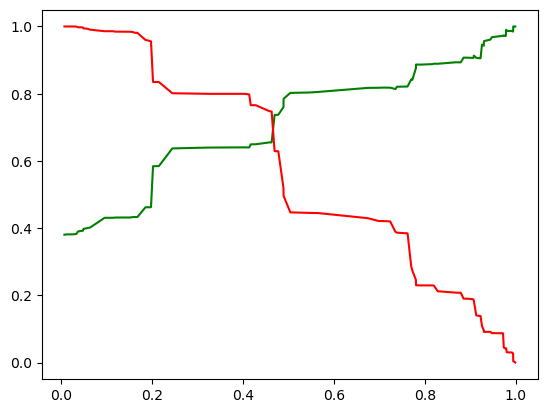

In [2084]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

##### The above graph shows the trade-off between the Precision and Recall .

#### Making predictions on the test set
Scaling the test data

In [2087]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [2088]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Specialization_Others,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent
5529,0.848012,True,False,False,False,False,False,False,False,False
7209,-0.878173,True,False,False,False,False,False,False,False,True
4368,-0.883664,False,True,False,False,False,False,False,False,False
2397,0.879131,True,False,False,False,False,False,False,False,True
5805,-0.883664,False,True,False,False,False,False,False,False,True


In [2089]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm.astype(int))
y_test_pred[:10]

5529    0.197726
7209    0.462951
4368    0.907698
2397    0.462951
5805    0.971749
8258    0.477633
2231    0.197726
4779    0.971749
4606    0.215032
3627    0.215032
dtype: float64

In [2090]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
5529,0.197726
7209,0.462951
4368,0.907698
2397,0.462951
5805,0.971749


In [2091]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [2092]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [2093]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [2094]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [2095]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,5529,0.197726
1,1,7209,0.462951
2,1,4368,0.907698
3,1,2397,0.462951
4,1,5805,0.971749


In [2096]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [2097]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,5529,0.197726
1,1,7209,0.462951
2,1,4368,0.907698
3,1,2397,0.462951
4,1,5805,0.971749


In [2098]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted
0,0,5529,0.197726,0
1,1,7209,0.462951,1
2,1,4368,0.907698,1
3,1,2397,0.462951,1
4,1,5805,0.971749,1


In [2099]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.7531227038941954


In [2100]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1230,  475],
       [ 197,  820]])

In [2101]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2102]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8062930186823992


In [2103]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7214076246334311


In [2104]:
#Assigning Lead Score to the Testing data
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted,Lead_Score
0,0,5529,0.197726,0,20
1,1,7209,0.462951,1,46
2,1,4368,0.907698,1,91
3,1,2397,0.462951,1,46
4,1,5805,0.971749,1,97


In [2105]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Converted,Prospect ID,Converted_prob,final_predicted,Lead_Score
2,1,4368,0.907698,1,91
4,1,5805,0.971749,1,97
7,1,4779,0.971749,1,97
17,1,2387,0.878824,1,88
22,1,5781,0.971749,1,97
...,...,...,...,...,...
2659,1,7518,0.929417,1,93
2664,1,8783,0.978911,1,98
2681,1,3179,0.907698,1,91
2688,1,3713,0.907698,1,91


In [2106]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([4368, 5805, 4779, 2387, 5781, 5661, 2351,  249, 4677, 2648,  460,
       1820,   66, 4485,  130, 7219, 8480, 4575, 3279, 2540, 4194, 4404,
       5297, 8784, 1009, 4813, 8082, 7466, 4770, 5782, 1896, 8409, 4046,
       3209, 4522, 6306, 7091, 8187, 1384, 4136, 5588, 2693, 2959, 1777,
       2490, 4435, 8598, 4768, 5362, 5803, 7337, 4853,  737,  548, 6311,
       1856, 7679, 4773, 1200, 4146, 2082, 5194, 2010, 6287, 5273, 3296,
       1679, 2011, 7324, 5801, 3092, 4827, 3540, 8638, 8798, 3336, 6043,
       5798, 4673, 8877, 2381, 2669, 7967, 7102, 2039, 4889, 8059, 7486,
       5869, 8103, 8599, 5683,  802, 4528, 1572, 5048, 6455, 1762, 4952,
       1562, 3269, 4932,  556,  739, 7638, 2458, 3759, 2658, 3019, 1296,
       5695, 2472, 5436, 7164, 3207, 4704, 4220, 5802, 4227, 7231, 3999,
       3649, 1567, 2336, 2809, 3755, 3191, 1925, 5787, 1533, 7126, 8045,
       6025, 1556, 4478, 4697, 3245,  482, 5440,  561, 3444, 8027, 2659,
       4887, 8184, 2760, 1975, 8840, 5696, 6420,  4

In [2107]:
#Finding out the Important Features from our final model:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website              3.108442
Last Activity_Had a Phone Conversation    2.438659
Lead Origin_Lead Add Form                 2.330168
Total Time Spent on Website               1.311043
Last Activity_SMS Sent                    1.252101
Lead Source_Olark Chat                    0.306074
const                                    -0.044317
Lead Origin_Landing Page Submission      -1.356251
Last Activity_Olark Chat Conversation    -1.389041
Specialization_Others                    -1.556613
Last Activity_Email Bounced              -1.956453
dtype: float64

#### Conclusion
It was found that the variables that mattered the most in the potential buyers are (In descending order) :

1. The total time spend on the Website.
2. Total number of visits.
3. When the lead source was:
    1. Google
    2. Direct traffic
    3. Organic search
    4. Welingak website
8. When the last activity was:
    1. SMS
    2. Olark chat conversation
10. When the lead origin is Lead add format.
11. When their current occupation is as a working professional.
Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.

### Recommendation:
* The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.
* The company should make calls to the leads who are the "working professionals" as they are more likely to get converted.
* The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.
* The company should make calls to the leads coming from the lead sources "Olark Chat" as these are more likely to get converted.
* The company should make calls to the leads whose last activity was SMS Sent as they are more likely to get converted.
* The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.
* The company should not make calls to the leads whose lead origin is "Landing Page Submission" as they are not likely to get converted.
* The company should not make calls to the leads whose Specialization was "Others" as they are not likely to get converted.
* The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.